<h1>Chapter 3 | Data Exercise #1 | <code>hotels-vienna</code>: EDA</h1>

<p>1. Pick another city beyond Vienna from the <code>hotels-vienna</code> dataset.</p>
<p>Assignments:</p>
<ul>
    <li>Create a table comparable to the one used in our case study.</li>
    <li>Visualize the distribution of the distance and the distribution of price and compute their summary statistics.</li>
    <li>Are there extreme values? What would you do with them? Describe the two distributions in a few sentences.</li>
</ul>
<h2><b>1.</b> Load the data</h2>
<p>Maybe I got the idea wrong, but it feels like a good idea to explore a different city instead of looking at Vienna's extreme values - we can do this at the end of this notebook. For now, let's select a different European city - <b>Rome</b> - and reproduce the exploration performed in the book. We can even compare our findings with Vienna too!</p>

In [198]:
import os
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
from mizani.formatters import percent_format

warnings.filterwarnings("ignore")
%matplotlib inline

In [199]:
# Increase number of returned rows in pandas
pd.set_option("display.max_rows", 500)

In [200]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_data_exercises")[0]

# Get location folders
data_in = f"{dirname}da_data_repo/hotels-europe/raw/"
data_out = f"{dirname}da_data_exercises/ch03-exploratory_data_analysis/01-hotels_europe/data/clean/"
output = f"{dirname}da_data_exercises/ch03-exploratory_data_analysis/01-hotels_europe/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [201]:
from py_helper_functions import *

In [202]:
hotels_europe = pd.read_csv(f"{data_in}hotelbookingdata.csv")

<p>Let's pick another city. Let's pick <b>Rome</b>.

In [203]:
hotels_europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149966 entries, 0 to 149965
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   addresscountryname      149966 non-null  object 
 1   city_actual             149966 non-null  object 
 2   rating_reviewcount      139379 non-null  float64
 3   center1distance         149966 non-null  object 
 4   center1label            149966 non-null  object 
 5   center2distance         149852 non-null  object 
 6   center2label            149852 non-null  object 
 7   neighbourhood           149966 non-null  object 
 8   price                   149966 non-null  int64  
 9   price_night             149966 non-null  object 
 10  s_city                  149966 non-null  object 
 11  starrating              149966 non-null  float64
 12  rating2_ta              136929 non-null  float64
 13  rating2_ta_reviewcount  136929 non-null  float64
 14  accommodationtype   

In [204]:
hotels_europe["s_city"].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Belgrade', 'Berlin',
       'Birmingham', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest',
       'Copenhagen', 'Dublin', 'Dubrovnik', 'Glasgow', 'Hamburg',
       'Helsinki', 'Istanbul', 'Kiev', 'Krakow', 'Lisbon', 'London',
       'Lyon', 'Madrid', 'Marseille', 'Milan', 'Minsk', 'Moscow',
       'Munich', 'Naples', 'Nicosia', 'Paris', 'Prague', 'Riga', 'Rome',
       'Rotterdam', 'Salzburg', 'Samara', 'Seville', 'Sofia',
       'St. Petersburg', 'Stockholm', 'Tallin', 'Valetta', 'Vienna',
       'Vilnius', 'Warsaw', 'Zagreb'], dtype=object)

In [205]:
"Rome" in hotels_europe["s_city"].unique()

True

In [206]:
rome = hotels_europe.loc[hotels_europe["s_city"] == "Rome"].reset_index(drop=True)
rome.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Italy,Rome,NaN,2.3 miles,City centre,2.0 miles,Palazzo Madama,Aurelio,2433,price for 4 nights,...,_ACCOM_TYPE@Apartment,NaN,1,15165.0,0,0% no offer,2017,12,0,1
1,Italy,Rome,19.0,3.2 miles,City centre,2.9 miles,Palazzo Madama,Aurelio,119,price for 1 night,...,_ACCOM_TYPE@Hotel,3.5 /5,0,15166.0,1,1-15% offer,2018,6,1,0
2,Italy,Rome,19.0,3.2 miles,City centre,2.9 miles,Palazzo Madama,Aurelio,128,price for 1 night,...,_ACCOM_TYPE@Hotel,3.5 /5,0,15166.0,0,0% no offer,2018,5,1,0
3,Italy,Rome,19.0,3.2 miles,City centre,2.9 miles,Palazzo Madama,Aurelio,385,price for 4 nights,...,_ACCOM_TYPE@Hotel,3.5 /5,0,15166.0,1,15-50% offer,2017,12,0,1
4,Italy,Rome,19.0,3.2 miles,City centre,4.2 miles,Grotta del Bue Marino,Aurelio,69,price for 1 night,...,_ACCOM_TYPE@Hotel,3.5 /5,0,15167.0,1,15-50% offer,2018,2,1,0


<p>Now, we got the raw data and filtered it to keep only observations for Rome. We'll have to do some cleanup now.</p>
<h2>2. Clean the data</h2>
<p>Let's make it quicker this time (not what she said!).</p>
<h3>2.1 Check the integrity of variables</h3>

In [207]:
# transform distance variables to numeric
rome["distance"] = rome["center1distance"].str.split(" ").apply(lambda x: float(x[0]))
rome["distance_alter"] = rome["center2distance"].str.split(" ").apply(lambda x: float(x[0]))

In [208]:
rome[["distance", "distance_alter"]]

,distance,distance_alter
0,2.3,2.0
1,3.2,2.9
2,3.2,2.9
3,3.2,2.9
4,3.2,4.2
...,...,...
15944,0.5,0.7
15945,0.5,0.8
15946,0.5,0.8
15947,0.5,0.7


In [209]:
rome[["distance", "distance_alter"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15949 entries, 0 to 15948
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distance        15949 non-null  float64
 1   distance_alter  15949 non-null  float64
dtypes: float64(2)
memory usage: 249.3 KB


<p>Properly format <code>accommodation_type</code>.</p>

In [210]:
rome["accommodation_type"] = (
    rome["accommodationtype"].str.split("@").apply(lambda x: x[1]).str.strip()
)

In [211]:
rome["accommodation_type"]

0          Apartment
1              Hotel
2              Hotel
3              Hotel
4              Hotel
            ...     
15944    Guest House
15945    Guest House
15946    Guest House
15947    Guest House
15948    Guest House
Name: accommodation_type, Length: 15949, dtype: object

<p>Clean <code>price_night</code> and return the number of nights for the observed price value.</p>

In [212]:
# split the string on the 2nd whitespace
rome["nnight"] = rome["price_night"].str.split(" ").apply(lambda x: int(x[2]))

In [213]:
rome["nnight"]

0        4
1        1
2        1
3        4
4        1
        ..
15944    1
15945    1
15946    1
15947    1
15948    1
Name: nnight, Length: 15949, dtype: int64

<p>Clean <code>guestreviewsrating</code> and get rid of the <code>/5</code> for each 1 to 5 star rating.</p>

In [214]:
rome["rating"] = (
    rome["guestreviewsrating"]
    .str.split(" ")
    .apply(lambda x: float(x[0]) if type(x) == list else None)
)

In [215]:
rome["rating"]

0        NaN
1        3.5
2        3.5
3        3.5
4        3.5
        ... 
15944    4.1
15945    4.1
15946    4.1
15947    4.1
15948    4.1
Name: rating, Length: 15949, dtype: float64

In [216]:
rome["rating_count"] = rome["rating_reviewcount"].apply(float)
rome["rating_count"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
rating_count,14470.0,97.427229,140.748296,1.0,17.0,49.0,122.0,1489.0


<h3>2.2 Rename variables</h3>

In [217]:
rome = rome.rename(
    columns={
        "rating2_ta": "ratingta",
        "rating2_ta_reviewcount": "ratingta_count",
        "addresscountryname": "country",
        "s_city": "city",
        "starrating": "stars",
    }
)

<h3>2.3 Remove columns</h3>

In [218]:
rome = rome.drop(
    columns=[
        "center2distance",
        "center1distance",
        "price_night",
        "guestreviewsrating",
        "rating_reviewcount",
    ]
)

In [219]:
rome.head()

,country,city_actual,center1label,center2label,neighbourhood,price,city,stars,ratingta,ratingta_count,...,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnight,rating,rating_count
0,Italy,Rome,City centre,Palazzo Madama,Aurelio,2433,Rome,0.0,NaN,NaN,...,2017,12,0,1,2.3,2.0,Apartment,4,NaN,NaN
1,Italy,Rome,City centre,Palazzo Madama,Aurelio,119,Rome,4.0,3.5,300.0,...,2018,6,1,0,3.2,2.9,Hotel,1,3.5,19.0
2,Italy,Rome,City centre,Palazzo Madama,Aurelio,128,Rome,4.0,3.5,300.0,...,2018,5,1,0,3.2,2.9,Hotel,1,3.5,19.0
3,Italy,Rome,City centre,Palazzo Madama,Aurelio,385,Rome,4.0,3.5,300.0,...,2017,12,0,1,3.2,2.9,Hotel,4,3.5,19.0
4,Italy,Rome,City centre,Grotta del Bue Marino,Aurelio,69,Rome,4.0,3.5,300.0,...,2018,2,1,0,3.2,4.2,Hotel,1,3.5,19.0


In [220]:
rome["city_actual"].value_counts()

Rome              15631
Fiumicino           232
Ciampino             64
Roma                  8
ROME                  8
Fiumicino (RM)        5
ROMA                  1
Name: city_actual, dtype: int64

In [221]:
city_actual_mapping = {
    "Roma": "Rome",
    "Fiumicino (RM)": "Fiumicino",
}

rome["city_actual"] = rome["city_actual"].replace(city_actual_mapping)

In [222]:
rome["city_actual"].value_counts()

Rome         15639
Fiumicino      237
Ciampino        64
ROME             8
ROMA             1
Name: city_actual, dtype: int64

<h3>2.4 Deal with missing values</h3>
<p>Let's check for missing values for each variable.</p>

In [223]:
rome.isna().sum()

country                  0
city_actual              0
center1label             0
center2label             0
neighbourhood            0
price                    0
city                     0
stars                    0
ratingta              1170
ratingta_count        1170
accommodationtype        0
scarce_room              0
hotel_id                 0
offer                    0
offer_cat                0
year                     0
month                    0
weekend                  0
holiday                  0
distance                 0
distance_alter           0
accommodation_type       0
nnight                   0
rating                1479
rating_count          1479
dtype: int64

In [224]:
def tabulate(series, drop_missing=False):
    """Tabulate a pandas Series and return statistical observations."""
    table = (
        pd.concat(
            [
                series.value_counts(dropna=drop_missing)
                .sort_index()
                .round(2)
                .rename("Freq."),
                series.value_counts(normalize=True, dropna=drop_missing)
                .sort_index()
                .rename("Perc."),
            ],
            axis=1
        )
        .assign(Cum=lambda x: x["Perc."].cumsum())
        .round(3)
    )
    return table

In [225]:
rome["misratingta"] = rome["ratingta"].isnull()
rome["misratingta_count"] = rome["ratingta_count"].isnull()
rome["misrating"] = rome["rating"].isnull()

In [226]:
tabulate(rome["misratingta"])

,Freq.,Perc.,Cum
False,14779,0.927,0.927
True,1170,0.073,1.000


In [227]:
tabulate(rome["misratingta_count"])

,Freq.,Perc.,Cum
False,14779,0.927,0.927
True,1170,0.073,1.000


In [228]:
tabulate(rome["misrating"])

,Freq.,Perc.,Cum
False,14470,0.907,0.907
True,1479,0.093,1.000


<p>Less than 1% of missing data for each variable.</p>

In [229]:
pd.crosstab(rome["accommodation_type"], rome["misratingta"], margins=True)

misratingta,False,True,All
accommodation_type,,,
,17,0,17
Apart-hotel,21,0,21
Apartment,492,725,1217
Bed and breakfast,2840,85,2925
Caravan Park,20,0,20
Guest House,5504,341,5845
Hostel,74,0,74
Hotel,5518,0,5518
Inn,196,11,207


In [230]:
pd.crosstab(rome["accommodation_type"], rome["misrating"], margins=True)

misrating,False,True,All
accommodation_type,,,
,12,5,17
Apart-hotel,21,0,21
Apartment,729,488,1217
Bed and breakfast,2577,348,2925
Caravan Park,20,0,20
Guest House,5273,572,5845
Hostel,67,7,74
Hotel,5478,40,5518
Inn,202,5,207


<p><code>Apartment</code> variables are a no-go. Let's drop them.</code>

In [231]:
rome = rome.dropna()
rome = rome.loc[rome["accommodation_type"] != "Apartment"]

In [232]:
rome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13479 entries, 1 to 15948
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             13479 non-null  object 
 1   city_actual         13479 non-null  object 
 2   center1label        13479 non-null  object 
 3   center2label        13479 non-null  object 
 4   neighbourhood       13479 non-null  object 
 5   price               13479 non-null  int64  
 6   city                13479 non-null  object 
 7   stars               13479 non-null  float64
 8   ratingta            13479 non-null  float64
 9   ratingta_count      13479 non-null  float64
 10  accommodationtype   13479 non-null  object 
 11  scarce_room         13479 non-null  int64  
 12  hotel_id            13479 non-null  float64
 13  offer               13479 non-null  int64  
 14  offer_cat           13479 non-null  object 
 15  year                13479 non-null  int64  
 16  mont

<h3>2.5 Dealing with duplicates</h3>

In [233]:
rome = rome.sort_values(by=["hotel_id", "price"])
rome[rome.duplicated(keep=False)][
    [
        "hotel_id",
        "accommodation_type",
        "price",
        "distance",
        "stars",
        "rating",
        "rating_count",
    ]
]

,hotel_id,accommodation_type,price,distance,stars,rating,rating_count
24,15173.0,Bed and breakfast,87,2.2,0.0,4.0,4.0
25,15173.0,Bed and breakfast,87,2.2,0.0,4.0,4.0
195,15228.0,Hotel,80,3.2,3.0,4.5,140.0
199,15228.0,Hotel,80,3.2,3.0,4.5,140.0
282,15257.0,Guest House,78,3.3,0.0,4.0,1.0
...,...,...,...,...,...,...,...
15900,20035.0,Hotel,315,0.5,4.0,4.8,505.0
15929,20043.0,Hotel,229,0.5,4.0,3.9,225.0
15931,20043.0,Hotel,229,0.5,4.0,3.9,225.0
15933,20045.0,Hotel,260,0.5,5.0,4.4,334.0


<p>A sizable number of duplicates. Let's drop them.</p>

In [234]:
rome = rome.drop_duplicates()

In [235]:
rome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 1 to 15942
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             13214 non-null  object 
 1   city_actual         13214 non-null  object 
 2   center1label        13214 non-null  object 
 3   center2label        13214 non-null  object 
 4   neighbourhood       13214 non-null  object 
 5   price               13214 non-null  int64  
 6   city                13214 non-null  object 
 7   stars               13214 non-null  float64
 8   ratingta            13214 non-null  float64
 9   ratingta_count      13214 non-null  float64
 10  accommodationtype   13214 non-null  object 
 11  scarce_room         13214 non-null  int64  
 12  hotel_id            13214 non-null  float64
 13  offer               13214 non-null  int64  
 14  offer_cat           13214 non-null  object 
 15  year                13214 non-null  int64  
 16  mont

In [236]:
rome.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,13214.0,197.791509,228.625022,23.0,84.0,124.0,212.0,4505.0
stars,13214.0,1.361208,1.721751,0.0,0.0,0.0,3.0,5.0
ratingta,13214.0,4.062055,0.634899,1.0,3.5,4.0,4.5,5.0
ratingta_count,13214.0,343.431209,523.232573,0.0,49.0,139.0,431.0,6874.0
scarce_room,13214.0,0.762449,0.425599,0.0,1.0,1.0,1.0,1.0
hotel_id,13214.0,17589.415014,1396.976475,15166.0,16395.0,17566.5,18796.0,20047.0
offer,13214.0,0.595353,0.490842,0.0,0.0,1.0,1.0,1.0
year,13214.0,2017.603527,0.489183,2017.0,2017.0,2018.0,2018.0,2018.0
month,13214.0,7.028076,3.909525,2.0,4.0,6.0,12.0,12.0
weekend,13214.0,0.603905,0.489103,0.0,0.0,1.0,1.0,1.0


<h2>3. Export the clean dataset</h2>

In [237]:
rome.to_csv(f"{data_out}hotels_rome_clean.csv", index=False)

<h2>4. Actual Exploratory Analysis</h2>
<h3>4.1 Describing distributions | Distance</h3>
<p>Let's check the number of observations for <code>accommodation_type</code>.</p>

In [238]:
rome["accommodation_type"].value_counts()

Hotel                  5363
Guest House            4966
Bed and breakfast      2489
Inn                     189
Vacation home Condo      88
Hostel                   67
Caravan Park             20
Apart-hotel              20
                         12
Name: accommodation_type, dtype: int64

<p>For now, let's keep our data restricted to hotels, as we want to relate our analysis to that of the book's.</p>

In [239]:
rome_hotels = rome.loc[lambda x: x["accommodation_type"] == "Hotel"]
rome_hotels["accommodation_type"].value_counts()

Hotel    5363
Name: accommodation_type, dtype: int64

<h4>4.1.1 Visualize summary statistics</h4>

In [240]:
rome_hotels.head()

,country,city_actual,center1label,center2label,neighbourhood,price,city,stars,ratingta,ratingta_count,...,holiday,distance,distance_alter,accommodation_type,nnight,rating,rating_count,misratingta,misratingta_count,misrating
1,Italy,Rome,City centre,Palazzo Madama,Aurelio,119,Rome,4.0,3.5,300.0,...,0,3.2,2.9,Hotel,1,3.5,19.0,False,False,False
6,Italy,Rome,City centre,Palazzo Madama,Aurelio,119,Rome,4.0,3.5,300.0,...,0,3.2,2.9,Hotel,1,3.5,19.0,False,False,False
2,Italy,Rome,City centre,Palazzo Madama,Aurelio,128,Rome,4.0,3.5,300.0,...,0,3.2,2.9,Hotel,1,3.5,19.0,False,False,False
3,Italy,Rome,City centre,Palazzo Madama,Aurelio,385,Rome,4.0,3.5,300.0,...,1,3.2,2.9,Hotel,4,3.5,19.0,False,False,False
4,Italy,Rome,City centre,Grotta del Bue Marino,Aurelio,69,Rome,4.0,3.5,300.0,...,0,3.2,4.2,Hotel,1,3.5,19.0,False,False,False


In [241]:
def bowley_skewness(data):
    mean = data.mean()
    median = data.median()
    std = data.std()
    return (mean - median) / std

In [242]:
statistics = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        rome_hotels["distance"].mean(),
        rome_hotels["distance"].median(),
        rome_hotels["distance"].mode().iloc[0],
        rome_hotels["distance"].min(),
        rome_hotels["distance"].max(),
        rome_hotels["distance"].quantile(0.75) - rome_hotels["distance"].quantile(0.25),
        rome_hotels["distance"].quantile(0.25),
        rome_hotels["distance"].quantile(0.75),
        bowley_skewness(rome_hotels["distance"]),
        rome_hotels["distance"].std(),
        rome_hotels["distance"].count(),
    ],
}

summary_table = pd.DataFrame.from_dict(statistics).round(1)
summary_table

,Statistics,Value
0,Mean,2.1
1,Median,1.1
2,Mode,1.1
3,Min,0.1
4,Max,16.0
5,IQR,1.2
6,25th percentile,0.7
7,75th percentile,1.9
8,Skewness,0.3
9,Standard deviation,3.0


<p>Observations:</p>
<ul>
<li>The mean is 2.1, the median, 1.1, and the mode, also 1.1. Because the mean is higher than the median, we can expect a skewed distribution, with a right tail.</li>
<li>The data is widely distributed. We have a minimum value of 0.1 and max value of 16.0, which leads to a range of 15.9 miles. We have hotels that are in the city centre, as well as others that are very far from it.</li>
<li>The IQR is 1.2, which means that 50% of our hotels are located in a 1.2-mile distance from the city centre. This is not far and hints at two things: because it is close to the median (1.1), that our central values are very concentrated; and that indeed there can be some extreme values in our dataset.</li>
<li>The standard deviation is 3.0, which shows that there might be some dispersion in our data. Hence, we can expect that distances may vary significantly from the average - remember that our range is quite significant.</li>
<li>The skewness is positive , which shows that the mean is higher than the median. As such, we have some skew to the right, indicating some extreme values above the mean.</li>
</ul>



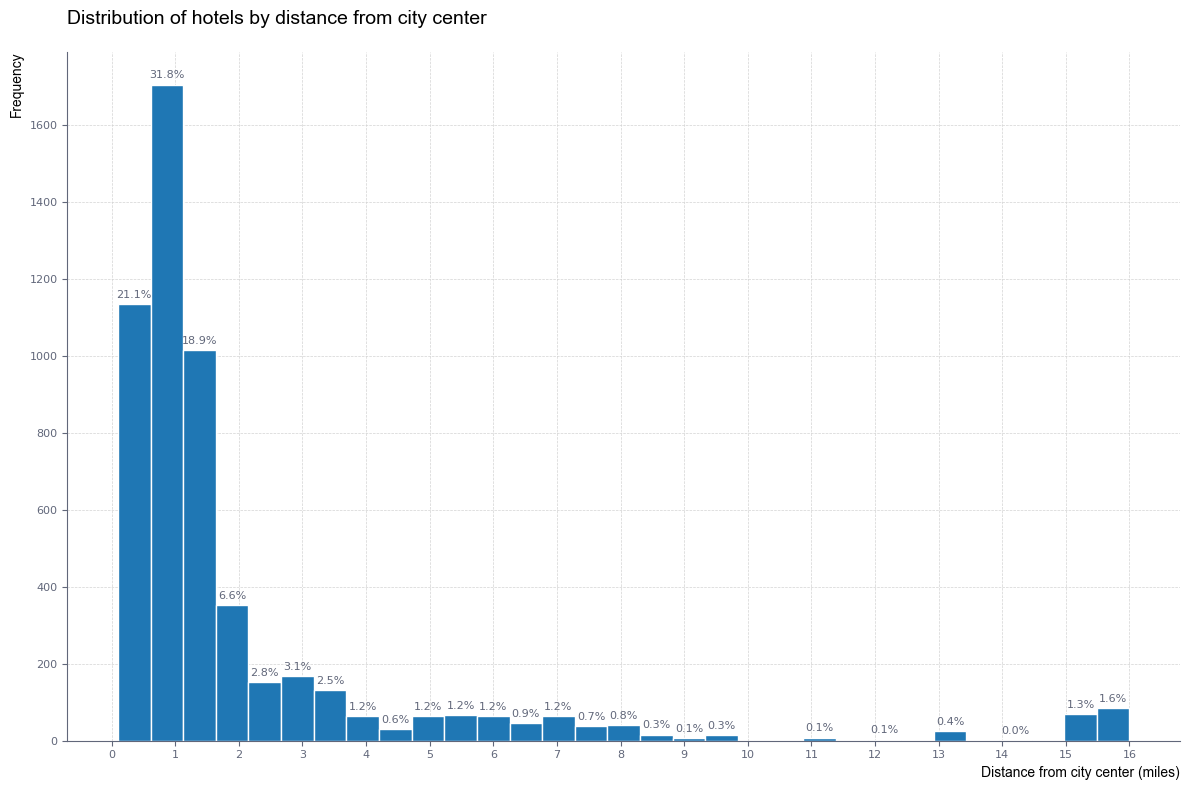

In [243]:
# Visualize the distribution of distance, no filters
# Set the bin width
bin_width = 0.5

# Create a new figure with adjusted padding
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_hotels["distance"], bins=int((rome_hotels["distance"].max() - rome_hotels["distance"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Distance from city center (miles)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, 17, 1), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_hotels["distance"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels by distance from city center",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p><b>Question</b> - are there extreme values?</p>
<p>There <b>are</b> extreme values located specially above a 11-mile distance. Particularly, there are a few observations clustered at the 15 to 16-mile distance bins. Because this visualization does not apply any filter, we could first consider applying similar filters as used in the book example. Moreover, we already know that some hotels are actually in neighbouring cities, and not in Rome. Filtering the data might lead to a more meaningful result.</p> 


In [184]:
# Apply filters
rome_cut = rome.loc[
    (rome["accommodation_type"] == "Hotel") &
    (rome["city_actual"] == "Rome") &
    (rome["stars"] >= 3) &
    (rome["stars"] <= 4) &
    (~rome["stars"].isnull()) &
    (rome["price"] <= 600)
    ]

In [244]:
print(f"Number of rows in the original dataset: {(rome_hotels['distance'].count())}\nNumber of rows in the filtered dataset: {(rome_cut['distance'].count())}")
print(f"Difference between non-filtered and filtered datasets: \n{(rome_hotels['distance'].count()) - rome_cut['distance'].count()}")

Number of rows in the original dataset: 5363
Number of rows in the filtered dataset: 4059
Difference between non-filtered and filtered datasets: 
1304


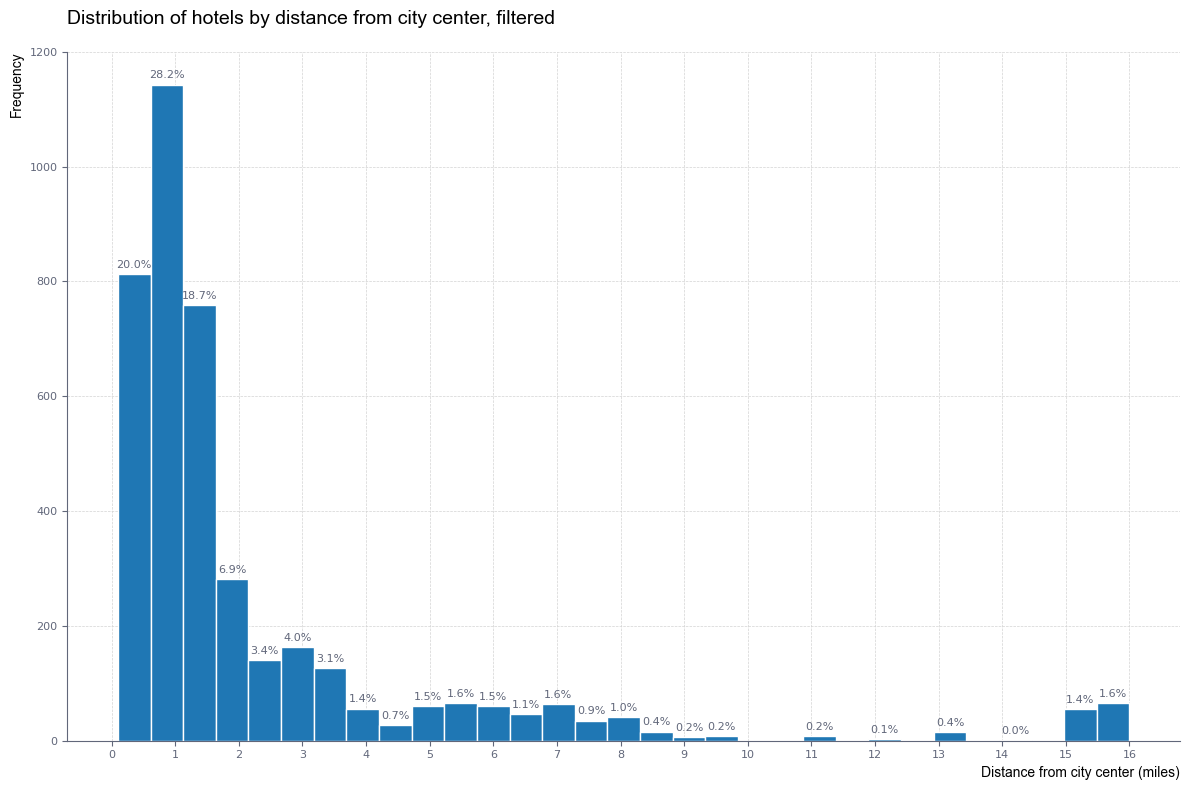

In [245]:
# Visualize the distribution of distance applying filters
# Set the bin width
bin_width = 0.5

# Create a new figure with adjusted padding
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_cut["distance"], bins=int((rome_cut["distance"].max() - rome_cut["distance"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Distance from city center (miles)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, 17, 1), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_cut["distance"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels by distance from city center, filtered",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>The main difference we can notice is that hotels between 3 to 4 stars with a price below 600 usd return observations that are not that concentrated in smaller differences. That is, our distribution does not become that skewed. We get higher percentage points for hotels ranging from 3 to 9-mile distances. Moreover, the proportion of hotels above the 9-mile bin fell significantly, which means that hotels that are far away either at the extreme of our filters - too expensive or whose ratings are too high or to low.</p>
<p>We can use the function we'd built, <code>tabulate</code>, to get the cumulative percentage points for the distance.</p>

In [187]:
tabulate(rome_cut["distance"])

,Freq.,Perc.,Cum
0.1,57,0.014,0.014
0.2,86,0.022,0.036
0.3,206,0.052,0.089
0.4,167,0.042,0.131
0.5,202,0.051,0.182
0.6,95,0.024,0.206
0.7,190,0.048,0.255
0.8,238,0.060,0.315
0.9,262,0.066,0.381
1.0,237,0.060,0.442


<p>As we can see, nearly 99% of the hotels are below a 9-mile distance. We would restrict our search to a shorter distance, but we could lose some good deals in the long run. Hence, given that if you're already that far from city center, probably an extra mile wouldn't make much of a difference if the price is worth it, let's keep our dataset below the 9-mile distance. First, we can reproduce the book's chart by making some annotations in the previous chart.</p>

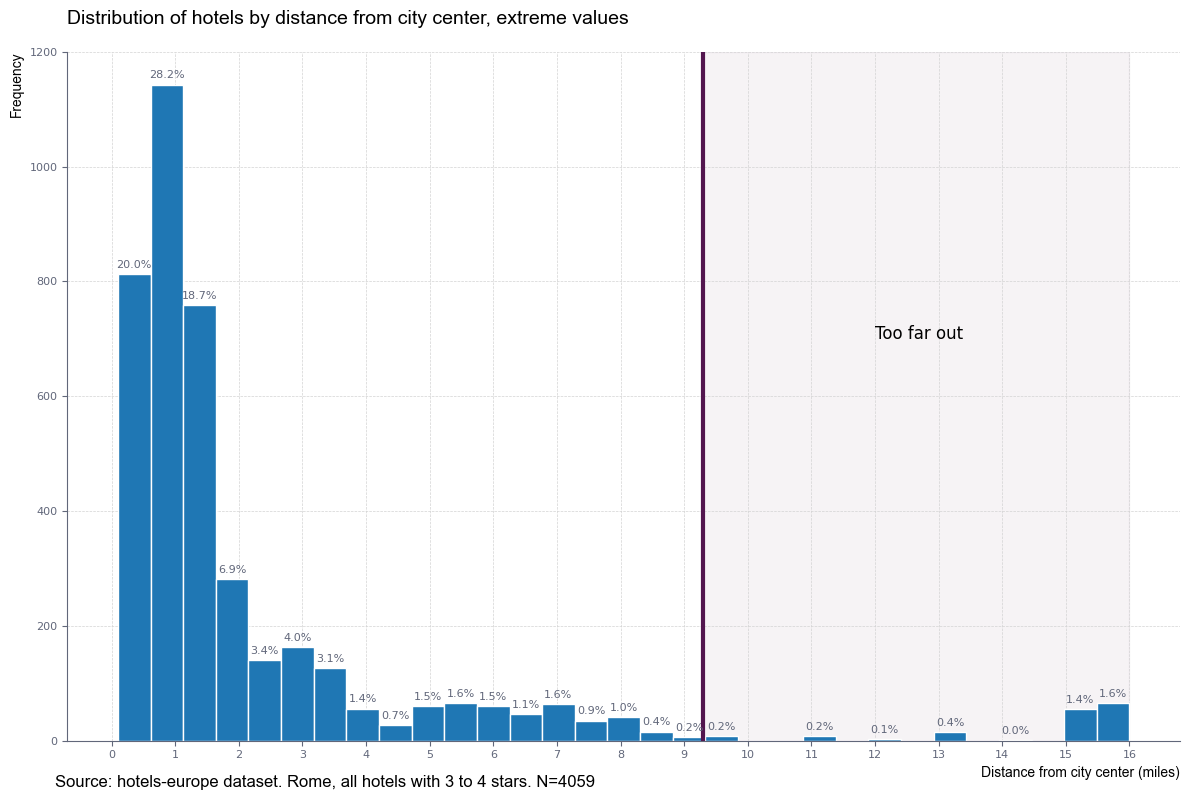

In [255]:
# Visualize the distribution of distance and annotate extreme values
# Set the bin width
bin_width = 0.5

# Create a new figure with adjusted padding
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_cut["distance"], bins=int((rome_cut["distance"].max() - rome_cut["distance"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Add vertical line at specified x-axis value
x_value = 9.3
plt.axvline(x=x_value, color="#52154E", linewidth=3, linestyle="-")

# Fill the are above the x_value with a different color
plt.axvspan(x_value, rome_cut["distance"].max(), color="#52154E", alpha=0.05)

# Make annotation
plt.annotate("Too far out", xy=(12, 700), horizontalalignment="left",fontsize=12)

# Add caption
txt=f"Source: hotels-europe dataset. Rome, all hotels with 3 to 4 stars. N={rome_cut['distance'].count()}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=12, fontdict={"fontname": "Arial"})

# Set x and y axis labels
plt.xlabel("Distance from city center (miles)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, 17, 1), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_cut["distance"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels by distance from city center, extreme values",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>Aha! That looks much better! We can see what matplotlib can do with a few (well, not a few, actually) tweaks here and there. But we got what we wanted. We filtered the data, identified some extreme values, and now we can get the summary statistics before dropping the observations above ouur 9-mile threshold.</p>

In [189]:
statistics = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        rome_cut["distance"].mean(),
        rome_cut["distance"].median(),
        rome_cut["distance"].mode().iloc[0],
        rome_cut["distance"].min(),
        rome_cut["distance"].max(),
        rome_cut["distance"].quantile(0.75) - rome_cut["distance"].quantile(0.25),
        rome_cut["distance"].quantile(0.25),
        rome_cut["distance"].quantile(0.75),
        bowley_skewness(rome_cut["distance"]),
        rome_cut["distance"].std(),
        rome_cut["distance"].count(),
    ],
}

summary_table = pd.DataFrame.from_dict(statistics).round(1)
summary_table

,Statistics,Value
0,Mean,1.9
1,Median,1.2
2,Mode,1.2
3,Min,0.1
4,Max,16.0
5,IQR,1.4
6,25th percentile,0.7
7,75th percentile,2.1
8,Skewness,0.3
9,Standard deviation,2.2


<p>There isn't a significant difference. 

<h3>4.2.2 Visualize the distribution of price and compute their summary statistics.</h3>

In [191]:
statistics_price = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        rome_cut["price"].mean(),
        rome_cut["price"].median(),
        rome_cut["price"].mode().iloc[0],
        rome_cut["price"].min(),
        rome_cut["price"].max(),
        rome_cut["price"].quantile(0.75) - rome_cut["price"].quantile(0.25),
        rome_cut["price"].quantile(0.25),
        rome_cut["price"].quantile(0.75),
        bowley_skewness(rome_cut["price"]),
        rome_cut["price"].std(),
        rome_cut["price"].count(),
    ],
}

summary_table = pd.DataFrame.from_dict(statistics_price).round(1)
summary_table

,Statistics,Value
0,Mean,168.0
1,Median,136.0
2,Mode,77.0
3,Min,35.0
4,Max,599.0
5,IQR,112.0
6,25th percentile,93.0
7,75th percentile,205.0
8,Skewness,0.3
9,Standard deviation,107.9


<p>Observations:</p>
<ul>
<li>The mean is 206 usd, the median, 138, and the mode, 66 usd. The three statistics are very different between themselves, which hints at a skewed distribution. Because the mean is higher than the median, we can expect a positive degree of skewness. Also, because the mode is far from the mean, we can also expect some data variability, which reflects the spread of the data.</li>
<li>The data is widely distributed. We have a minimum value of 32 usd and a max value of 4234 usd, which leads to a range of 4202 usd. Hence, we have very cheap and incredibly expensive hotel prices.</li>
<li>The IQR is 150.5, which means that 50% of our hotels are this price range. Considering that the mode is below the 25th percentile, we can infer that the prices are distributed across a wider range within the central portion of the dataset.</li>
<li>The standard deviation is very high - 221. It indicates that there is significant variability in hotel prices, which leads to a wide dispersion of prices. Moreover, we can also say that the prices are mot spread out, covering a broader range. Because of such high value, we can also infer that there are some extreme values - and indeed there are, as we can see on the max hotel price of 4234 usd. Here, we could make two assumptions. First, that there could be some price segmentation, in which some hotels cater to luxury travelers and others targetting budget-conscious travelers with lower prices. Second, there could be some correlation with hotel distance and price, but this is not our goal right now.</li>
<li>The skewness is positive , which shows that the mean is higher than the median. As such, we have some skew to the right, indicating some extreme values above the mean.</li>
</ul>
<h3>4.2.2 Visualize the distribution of price and compute their summary statistics.</h3>


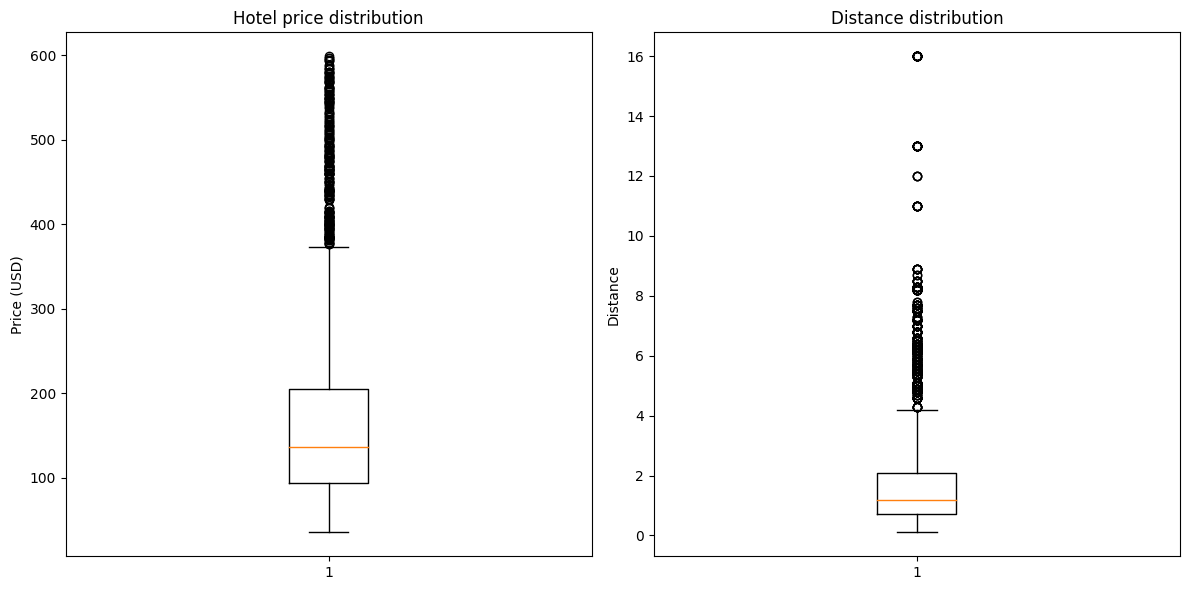

In [192]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot boxplot for the price
ax1.boxplot(rome_cut["price"])
ax1.set_title("Hotel price distribution")
ax1.set_ylabel("Price (USD)")

# Plot boxplot for the distance from the city centre
ax2.boxplot(rome_cut["distance"])
ax2.set_title("Distance distribution")
ax2.set_ylabel("Distance")

plt.tight_layout()
plt.show()

<p>The boxplot helps us to visualize the number of extreme values in the dataset. As we can see, there are indeed some very expensive hotels and some hotels that are very far away from the city centre. For now, let's focus on hotel prices, and then we will tackle distance once again.</p>

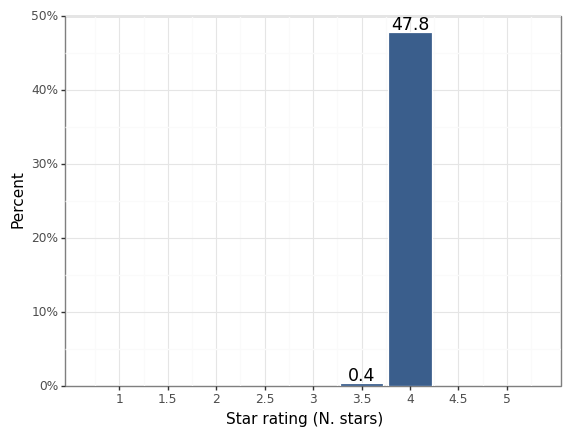

<ggplot: (179998213400)>

In [193]:
ggplot(rome_cut, aes(x="stars", y="stat(count)/sum(stat(count))")) + geom_bar(
    color="white", fill=color[0], alpha=0.8
) + labs(x="Star rating (N. stars)", y="Percent") + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0.5, 5.5], breaks=seq(1, 5.1, 0.5)
) + scale_y_continuous(
    expand=[0.00, 0.00],
    limits=[0, 0.5],
    breaks=seq(0, 0.51, 0.1),
    labels=percent_format(),
) + geom_text(
    aes(
        x="stars",
        y="[x+0.01 for x in stat(count)/sum(stat(count))]",
        label="[round(num,1) for num in stat(count)/sum(stat(count))*100)]"
    ),
    stat="count",
    size=12.5
) + theme_bw()

<p>Because our goal is to find cheap hotels that are close to the city centre, we can apply some filters and remove the absurdly expensive prices. Let's just plot the distribution of ratings to see how many hotels fall under the 3 to 4 stars rating.</p>

<p>As we can see, nearly 80% of the dataset falls between the 3-4 stars range. Let's keep those values and filter the data.</p>

In [194]:
rome_cut = rome.loc[
    (rome["accommodation_type"] == "Hotel") &
    (rome["city"] == "Rome") &
    (rome["stars"] >= 3) &
    (rome["stars"] <= 4) &
    (~rome["stars"].isnull()) &
    (rome["price"] <= 600)]

In [195]:
rome_cut.describe()

,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,year,month,weekend,holiday,distance,distance_alter,nnight,rating,rating_count
count,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000
mean,166.969451,3.478320,3.823479,702.203745,0.495689,17239.389012,0.708549,2017.636117,6.769155,0.637103,0.224686,2.294309,2.328628,1.302291,3.874747,198.901946
std,107.691435,0.498666,0.541358,629.792874,0.500043,1320.329554,0.454487,0.481175,3.848367,0.480895,0.417427,3.078915,3.067740,0.903158,0.438033,196.890563
min,35.000000,3.000000,2.000000,1.000000,0.000000,15166.000000,0.000000,2017.000000,2.000000,0.000000,0.000000,0.100000,0.000000,1.000000,2.500000,1.000000
25%,92.000000,3.000000,3.500000,277.000000,0.000000,16149.500000,0.000000,2017.000000,3.000000,0.000000,0.000000,0.800000,0.700000,1.000000,3.700000,77.000000
50%,135.000000,3.000000,4.000000,550.000000,0.000000,17063.000000,1.000000,2018.000000,5.000000,1.000000,0.000000,1.200000,1.300000,1.000000,3.900000,142.000000
75%,203.000000,4.000000,4.000000,918.000000,1.000000,18291.500000,1.000000,2018.000000,11.000000,1.000000,0.000000,2.300000,2.400000,1.000000,4.100000,248.000000
max,599.000000,4.000000,5.000000,6874.000000,1.000000,20043.000000,1.000000,2018.000000,12.000000,1.000000,1.000000,16.000000,17.000000,4.000000,4.800000,1489.000000


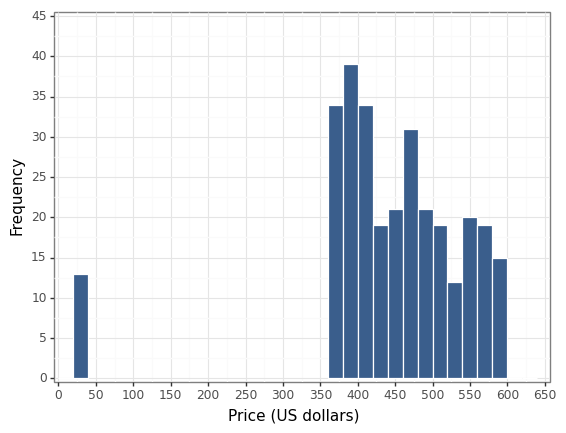

<ggplot: (179989946963)>

In [196]:
ggplot(rome_cut, aes(x="price")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=20, fill=color[0], color="white", boundary=0, closed="left"
) + labs( x="Price (US dollars)", y="Frequency"
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 650], breaks=seq(0, 651, 50)
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 45], breaks=seq(0, 46, 5)
) + theme_bw()

In [197]:
statistics_price = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        rome_cut["price"].mean(),
        rome_cut["price"].median(),
        rome_cut["price"].mode().iloc[0],
        rome_cut["price"].min(),
        rome_cut["price"].max(),
        rome_cut["price"].quantile(0.75) - rome_cut["price"].quantile(0.25),
        rome_cut["price"].quantile(0.25),
        rome_cut["price"].quantile(0.75),
        bowley_skewness(rome_cut["price"]),
        rome_cut["price"].std(),
        rome_cut["price"].count(),
    ],
}

summary_table = pd.DataFrame.from_dict(statistics_price).round(1)
summary_table

,Statistics,Value
0,Mean,167.0
1,Median,135.0
2,Mode,77.0
3,Min,35.0
4,Max,599.0
5,IQR,111.0
6,25th percentile,92.0
7,75th percentile,203.0
8,Skewness,0.3
9,Standard deviation,107.7


<p>Going back to our question, which asks us to describe